<a href="https://colab.research.google.com/github/marianatmatos/data_science/blob/main/notebooks/Fashion_MNIST_Clothing_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning CNN for Fashion-MNIST Clothing Classification


**Fashion MNIST** is a standard dataset used in Deep Learning and Computer Vision, consisting of 70,000 images associated with 10 classes label.

Despite bringing pre-processed images, it represents a good challenge to apply deep convolutional neural networks (**CNN**) for image classification from scratch. 
<figure>
<p align="center">
<img src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/fashion-mnist-sprite.png" height="400px">
</p>
</figure>

The dataset is divided between training (60,000 samples) and testing (10,000 samples), with Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

Each image belongs exclusively to a single class. The table below follows the Fashion MNIST documentation, where the possible 10 labels are documented:

<table>
  <tbody><tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</tbody></table>


## Obtaining Data

There are two ways to obtain Fashion MNIST data:

* Directly from the repository on Github (https://github.com/zalandoresearch/fashion-mnist)

* Loading from TensorFlow.

For this project, I will load the Fashion-MNIST dataset using the Keras API from TensorFlow

In [1]:
# Import libraries 
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import  keras
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Set up view
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

This data is divided into two datasets, **training** and **testing**, each of them have **X** and **y** arrays. They represent the images and the labels consecutively. 



In [2]:
# Load data
(X_train_orig, y_train_orig), (X_test_orig, y_test_orig) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Following the standardization of the documentation, I will create a list containing the labels from the dataset

In [3]:
# According to the documentation, the labels are:
labels_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

## Data Exploration

Although this data set is previously processed and well documented, we will explore quickly in order to draw some insights.

First, let's gonna check the array's dimensions

As previously seen, there are 60,000 samples of training and 10,000 tests, the images being 28 x 28 * pixels * in shades of gray (1 channel).

In [4]:
# See dimensionality
print('DataFrame dimensionality:')
print('X_train: ', X_train_orig.shape)
print('y_train: ', y_train_orig.shape)
print('X_test: ', X_test_orig.shape)
print('y_test: ', y_test_orig.shape)

DataFrame dimensionality:
X_train:  (60000, 28, 28)
y_train:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


I will check if the training and test datasets are balanced. In other words, if it contains an ideal proportion between the different classes.


In [5]:
# Verify unique value per class (train)
print('y_train_orig:')
np.unique(y_train_orig, return_counts=True)

y_train_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [6]:
# Verify unique value per class (test)
print('y_test_orig:')
np.unique(y_test_orig, return_counts=True)

y_test_orig:


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))

There is little to be explored in this preliminary exploratory analysis, as it is more than a step to increase
knowledge about the dataset.

Finally, let's view some images with their labels.

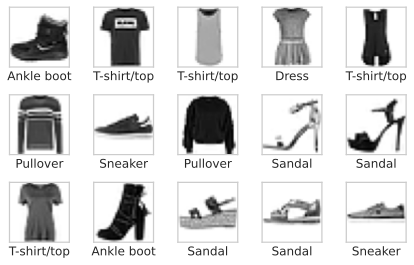

In [7]:
# Plot fisrt few images with labels
plt.figure(figsize=(6,6))
for i in range(15):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
  plt.xlabel(labels_name[y_train_orig[i]])
plt.tight_layout()


## Data Preprocessing

Before creating the model and training the neural network, let's go through some pre-processing steps.

### Normalize the pixels

The intensities of the pixels must be normalized, that is, the integer values ​​must be converted into `float` type and stay within the range $ [0, 1] $.
To be more specif we need to convert int `float32` type which is the acceptable form for tensorflow and keras.

As the maximum value of the pixel is 255, to do this we need to divide the x_train and x_test by 255., they will be normalized and `float`.

 **It's important that the training set and the testing set be preprocessed in the same way**




In [8]:
# Lambda function that transforms in float32 and normalize pixels
f = lambda x: (x /255).astype('float32')

# Apply lambda to X_train and X_test
X_train = f(X_train_orig)
X_test = f(X_test_orig)

### Resize image

The first convolutional layer expects a single tensor that contains all the pixels. TensorFlow expects a single list with 4 dimensions, not 60000 items of dimensions 28 x 28 x 1, as the  training dataset is sized (the same goes for the test data).


In [9]:
# Resize image
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

print('X_train:{}'.format(X_train.shape))
print('X_test:{}'.format(X_test.shape))

X_train:(60000, 28, 28, 1)
X_test:(10000, 28, 28, 1)


### One-Hot Enconding

The labels are already encoded between 0 and 9, what we call Integer Encoding. It is possible to directly use `y_train` and` y_test`, as long as `loss =' sparse_categorical_crossentropy '` is used.

However, using them directly can lead the Deep Learning model to understand that there is a natural relationship of order between the labels, which is not true - may result in poor performance or unexpected results. 

For categorical variables where there is no ordinal relationship, It is preferred to use the One-Hot Encoding method. To learn more about the differences between these two techniques, [read this article] (https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/).





In [10]:
y_train = keras.utils.to_categorical(y_train_orig) 
y_test = keras.utils.to_categorical(y_test_orig)

## Define Convolutional Neural Networks

There are a number of established CNN architectures. For this project, a simplified VGGNet architecture will be used, implemented in an article by Data Scientist Adrian Rosebroke.

In order to adapt the 28 x 28 dimensions of the images and to allow the use of the Keras API the origal implementation was modifier.

In [11]:
# based on MiniVGGNet implementation from Adrian Rosebroke
# first CONV => RELU => CONV => RELU => POOL layer set
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding="same", activation='relu',))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# second CONV => RELU => CONV => RELU => POOL layer set
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(keras.layers.BatchNormalization(axis=1))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))

# first (and only) set of FC => RELU layers
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))

# softmax classifier
model.add(keras.layers.Dense(10, activation='softmax'))

once the labels are one-hot encoded, `loss =" categorical_crossentropy "` will be used to compile the model.

the use of validation data in the proportion of 1/3 will be explicitly informed.


## Compile and Training model

Before training the model, it needs to be compiled. These are added during the model's compile step:

* **Loss function**:  Measures how accurate the model is during training. We want to minimize this function to guide the model in the right direction. Here we will use "sparse_categorical_crossentropy"

* **Optimizer**: This is how the model is updated based on the data it sees and its loss function.

* **Metrics**:  Used to judge the performance of your model.



In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training model and save information in history
history = model.fit(X_train, y_train, epochs=20, validation_split=0.3)

Epoch 1/20
1313/1313 [==============================] - 42s 7ms/step - loss: 0.7388 - accuracy: 0.7584 - val_loss: 0.3382 - val_accuracy: 0.8748
Epoch 2/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3557 - accuracy: 0.8694 - val_loss: 0.2720 - val_accuracy: 0.9003
Epoch 3/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2950 - accuracy: 0.8932 - val_loss: 0.2741 - val_accuracy: 0.8999
Epoch 4/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2660 - accuracy: 0.9028 - val_loss: 0.2356 - val_accuracy: 0.9181
Epoch 5/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2602 - accuracy: 0.9069 - val_loss: 0.2150 - val_accuracy: 0.9224
Epoch 6/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2275 - accuracy: 0.9164 - val_loss: 0.2347 - val_accuracy: 0.9146
Epoch 7/20
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2237 - accuracy: 0.9202 - val_loss: 0.2047 - val_accuracy

## Validate model

Our model achieved an accuracy of 95% in training data and 94% in validation data.

However, if we take a closer look we will see that it did not perform well for the "Shirts" category. This can probably be improved with data augmentation techniques.


In [13]:
y_hat = model.predict(X_test)
y_hat_classes = np.argmax(y_hat, axis=1)
print(classification_report(y_test_orig, y_hat_classes, target_names=labels_name))

              precision    recall  f1-score   support

 T-shirt/top       0.83      0.91      0.87      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.86      0.93      0.89      1000
       Dress       0.93      0.93      0.93      1000
        Coat       0.88      0.89      0.89      1000
      Sandal       0.98      0.99      0.99      1000
       Shirt       0.85      0.70      0.77      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.99      0.99      1000
  Ankle boot       0.98      0.97      0.98      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Looking at the accuracy and val_accuracy, it is possible to identify a small overfitting, but that did not significantly affect CNN's performance in relation to the validation data.


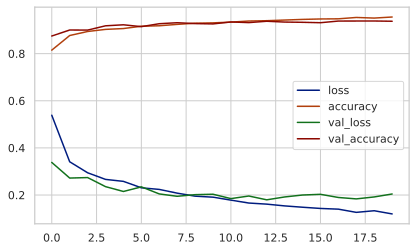

In [14]:
# Plot history optimization
pd.DataFrame(history.history).plot()
plt.show()

Finally, we see that the accuracy in the test dataset remains very good, which means that the model is generic enough to handle new data.


In [15]:
score = model.evaluate(X_test, y_test)

# Verify model performance
print('Loss:{:.4f}'.format(score[0]))
print('Acuracy:{:.4f}'.format(score[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.2302 - accuracy: 0.9269
Loss:0.2302
Acuracy:0.9269


Now let's see how our model predict the first nine images

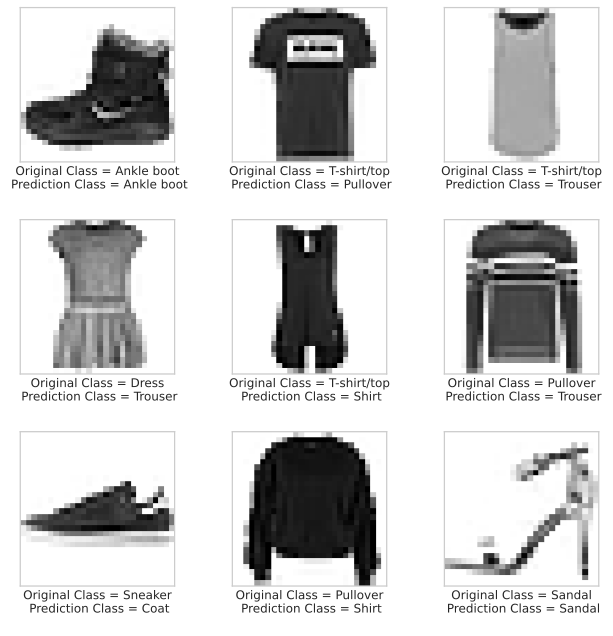

In [43]:
# Plot Predictions
plt.figure(figsize=(9,9))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train_orig[i], cmap=plt.cm.binary)
  plt.xlabel(f" Original Class = {labels_name[y_train_orig[i]]} \n Prediction Class = {labels_name[y_hat_classes[i]]}\n")
plt.tight_layout()
